In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train=np.loadtxt('input.csv', delimiter=',')
Y_train=np.loadtxt('labels.csv', delimiter=',')

X_test=np.loadtxt('input_test.csv', delimiter=',')
Y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255
X_test=X_test/255

In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [5]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

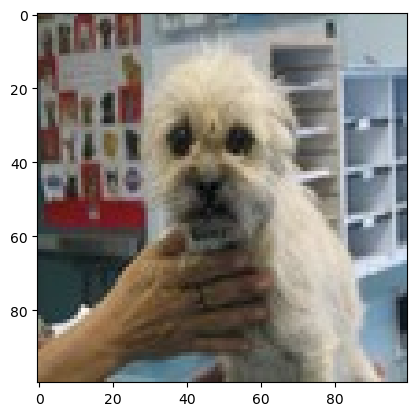

In [6]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [7]:
model=Sequential([
    Conv2D(32,(3,3),activation ='relu',input_shape=(100,100,3)), #LayerType(no. of filters, (size of the filter), activation,input shape)
    MaxPooling2D((2,2)),#Here, we just used the filter size
    
    Conv2D(32, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation ='relu'),#Dense((no. of nuerons), activation)
    Dense(1, activation ='sigmoid')
])

In [8]:
# opt=keras.optimizers.SGD(learning_rate=0.001) #this line is used for specifying the learning rate.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(X_train,Y_train,epochs=15,batch_size=64)

Epoch 1/15
32/32 [==============================] - 5s 163ms/step - loss: 0.7078 - accuracy: 0.5255
Epoch 2/15
32/32 [==============================] - 6s 185ms/step - loss: 0.6859 - accuracy: 0.5670
Epoch 3/15
32/32 [==============================] - 6s 196ms/step - loss: 0.6422 - accuracy: 0.6405
Epoch 4/15
32/32 [==============================] - 6s 187ms/step - loss: 0.6102 - accuracy: 0.6730
Epoch 5/15
32/32 [==============================] - 6s 200ms/step - loss: 0.5410 - accuracy: 0.7300
Epoch 6/15
32/32 [==============================] - 6s 187ms/step - loss: 0.4774 - accuracy: 0.7790
Epoch 7/15
32/32 [==============================] - 6s 186ms/step - loss: 0.4056 - accuracy: 0.8195
Epoch 8/15
32/32 [==============================] - 6s 195ms/step - loss: 0.3431 - accuracy: 0.8550
Epoch 9/15
32/32 [==============================] - 6s 186ms/step - loss: 0.2742 - accuracy: 0.8890
Epoch 10/15
32/32 [==============================] - 6s 188ms/step - loss: 0.2186 - accuracy: 0.9160

In [10]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 24ms/step - loss: 1.1781 - accuracy: 0.6825


[1.1780893802642822, 0.6825000047683716]

# Making Predictions

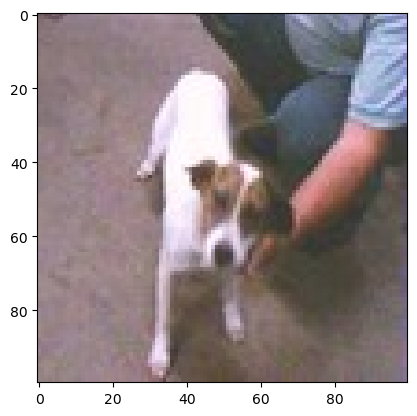

1/1 [==============================] - 0s 11ms/step
Our Model Says it's a dog


In [12]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
    
print("Our Model Says it's a", pred)